In [3]:
import sys
sys.path.append("../scripts")
import jax
jax.config.update("jax_enable_x64", True)

from make_lightcurve import make_lc
from make_params import make
from search_nuance import search as nsearch
#from search_wotan_tls import search as wsearch, trend
import matplotlib.pyplot as plt
import yaml


/Users/lgrcia/code/nuance/nuance/nuance.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


31.841373627942428
33.12084008708731


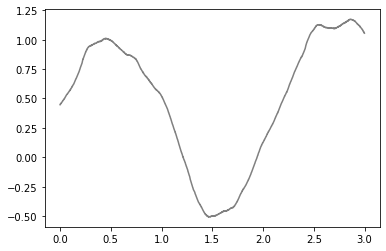

In [7]:
params = yaml.full_load(open("../data/dataset3/params/59.yaml", "r"))
print(params["relative_depth"])
print(params["relative_duration"])
x, y, e = make_lc(params, 11)
plt.plot(x, y, c="0.5")

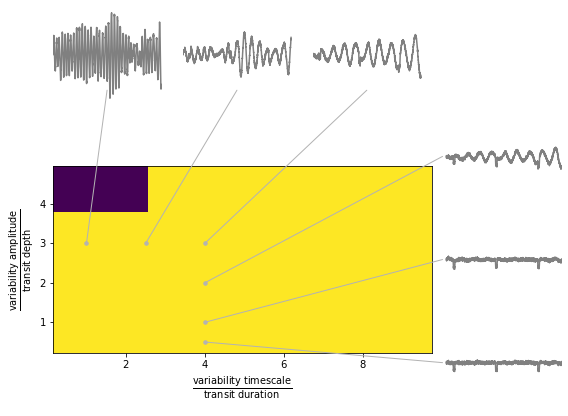

In [64]:
from matplotlib.patches import ConnectionPatch
import numpy as np
from scipy.stats import binned_statistic_2d
import pandas as pd

n = 4

amp = [0.5, 1, 2, 3][::-1]
var = [0.5, 1, 2.5, 4]
ymax = 0.06
seed = 4

scale = 1
fig = plt.figure(None, (n*2*scale, n*1.5*scale))

# main
main = plt.subplot(n, n, (n+1, n*n-1))
main.plot()
main.set_ylabel(r"$\frac{\mathrm{variability\; amplitude}}{\mathrm{transit\;depth}}$", fontsize=14)
main.set_xlabel(r"$\frac{\mathrm{variability\; timescale}}{\mathrm{transit\;duration}}$", fontsize=14)

bins = (4,4)
df = pd.read_csv("../data/dataset2/results/nuance/detections.csv")
detected, _var, _amp = df.values.T.astype(float)
stats = binned_statistic_2d(_var, _amp, detected, bins=bins)
plt.imshow(
    stats.statistic.T, 
    origin="lower",
    extent=(
        stats.x_edge.min(), 
        stats.x_edge.max(), 
        stats.y_edge.min(), 
        stats.y_edge.max()
    )
)
#main.set_xlim(0, 5)
#main.set_ylim(0, 5)

# ---

con_color = "0.7"

for i in range(1, 4):
    ax = plt.subplot(n, n, i*n+n)
    a = amp[i]
    v = var[-1]
    params = make(amp=a, var=v, seed=seed)
    x, y, e = make_lc(params, seed)
    ax.plot(x, y, c="0.5")
    con = ConnectionPatch(
        xyA=(-0.1, 0.), xyB=(v, a), coordsA="data", coordsB="data",
        axesA=ax, axesB=main, color=con_color)
    fig.add_artist(con)
    ax.set_ylim(-ymax, ymax)
    ax.set_xlim(-0.1, np.max(x))
    plt.axis('off')
    main.plot(v, a, ".", c=con_color, ms=7)
    #plt.plot(x, trend(x, y, params), alpha=0.5)

    
for i in range(1, 4):
    ax = plt.subplot(n, n, i)
    a = amp[0]
    v = var[i]
    params = make(amp=a, var=v, seed=seed)
    x, y, e = make_lc(params, seed)
    plt.plot(x, y, c="0.5")
    con = ConnectionPatch(
    xyA=(np.mean(x), -ymax*0.8), xyB=(v, a), coordsA="data", coordsB="data",
         axesA=ax, axesB=main, color=con_color)
    fig.add_artist(con)
    ax.set_ylim(-ymax, ymax)
    ax.set_xlim(0., np.max(x)*1.1)
    plt.axis('off')
    main.plot(v, a, ".", c=con_color, ms=7)
    #plt.plot(x, trend(x, y, params), alpha=0.5)

plt.tight_layout()

In [53]:
binned_statistic_2d(var, amp, detected, bins=bins)

BinnedStatistic2dResult(statistic=array([[1.        , 1.        , 0.83333333],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ]]), x_edge=array([0.15118464, 3.35232585, 6.55346705, 9.75460826]), y_edge=array([0.21099715, 1.7981018 , 3.38520644, 4.97231109]), binnumber=array([ 8, 17, 11, 11, 11, 17, 12, 11, 12, 18,  7, 18,  6, 11, 18, 17, 17,
        7, 16, 11,  7, 12,  7, 18, 11, 11, 12,  7, 18, 16,  7,  6, 11,  7,
       17, 18,  7, 17, 18, 18, 13, 13, 17, 12, 18, 18, 18, 12, 16, 12, 18,
       18, 18, 18,  6, 13, 16, 12,  8, 13, 11, 12,  6, 17, 12, 17,  7, 11,
       11, 18,  8, 17,  7, 16, 16, 16, 13,  8, 11, 18, 11, 13,  6,  8, 11,
        6, 11, 17, 12, 18, 16, 12,  8, 17, 12, 18, 12,  7, 12,  6]))

In [49]:
detected

array([True, True, True, True, True, True, True, True, True, True, True,
       True, True, True, True, True, True, True, True, True, True, True,
       True, True, True, True, True, True, True, True, True, True, True,
       True, True, True, True, True, True, True, True, True, True, True,
       True, True, True, True, True, True, True, True, True, True, True,
       True, True, True, False, True, True, True, True, True, True, True,
       True, True, True, True, True, True, True, True, True, True, True,
       True, True, True, True, True, True, True, True, True, True, True,
       True, True, True, True, True, True, True, True, True, True, True,
       True], dtype=object)

In [ ]:
t0, period, wperiods, wpower = wsearch(x, y, e, params, verbose=True)

Transit Least Squares TLS 1.0.31 (22 Nov 2021)
Creating model cache for 24 durations
Searching 2159 data points, 1000 periods from 1.0 to 1.8 days
Using 1 of 6 CPU threads


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 periods | 00:04<00:00


Searching for best T0 for period 1.03764 days


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 985/1000 periods | 00:04<00:00 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 961/1000 periods | 00:04<00:00 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 937/1000 periods | 00:04<00:00 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

In [47]:
t0, p0, nperiods, npower = nsearch(x, y, e, params, verbose=True)

  0%|          | 0/2160 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [48]:
from check_detection import right_candidate

detected = right_candidate(
    params['t0'], 
    params['period'], 
    t0, p0
)

In [49]:
detected

False

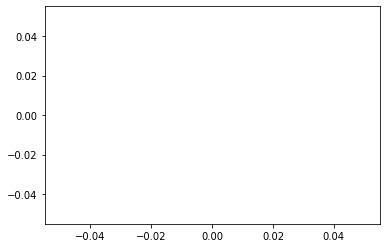

In [51]:
import numpy as np

#plt.plot(wperiods, wpower/np.max(wpower))
plt.plot(nperiods, npower/np.max(npower))